In [7]:
%pip install imutils


  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=d535770fc2f3f7faadd196f393c34cfb53a890619e7c9165029545d8453a6af0
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\31\d0\2c\87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


[INFO] loading images...
[INFO] stitching images...


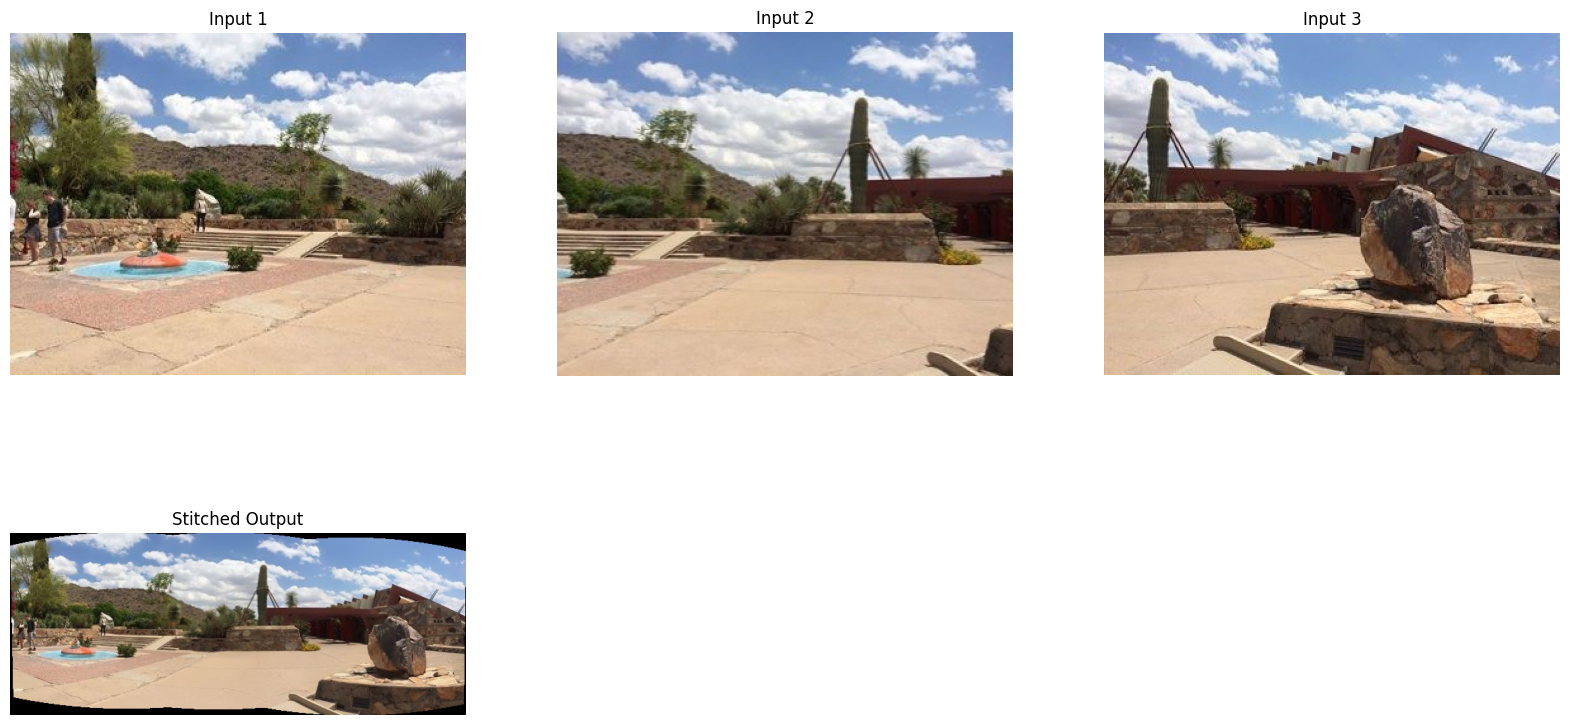

In [6]:
# import the necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt

def main():
    # grab the paths to the input images and initialize our images list
    print("[INFO] loading images...")
    imagePaths = ["monument1.jpg", "monument2.jpg", "monument3.jpg"]
    images = []

    # loop over the image paths, load each one, and add them to our
    # images to stitch list
    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        images.append(image)

    # initialize OpenCV's image stitcher object and then perform the image stitching
    print("[INFO] stitching images...")
    stitcher = cv2.Stitcher_create() 
    (status, stitched) = stitcher.stitch(images)

    # if the status is '0', then OpenCV successfully performed image stitching
    if status == cv2.Stitcher_OK:
        # Display the input images side by side and the stitched output image at the bottom
        fig, axes = plt.subplots(2, len(images), figsize=(20, 10))
        
        # Display input images
        for i, imagePath in enumerate(imagePaths):
            img = cv2.imread(imagePath)
            axes[0, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[0, i].set_title(f"Input {i+1}")
            axes[0, i].axis('off')
        
        # Display stitched output image
        output_img = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
        axes[1, 0].imshow(output_img)
        axes[1, 0].set_title("Stitched Output")
        axes[1, 0].axis('off')

        # Remove extra subplot if there are more input images
        for j in range(1, len(images)):
            fig.delaxes(axes[1, j])

        plt.show()

    # otherwise the stitching failed
    else:
        print("[INFO] image stitching failed ({})".format(status))

if __name__ == "__main__":
    # execute the main function
    main()


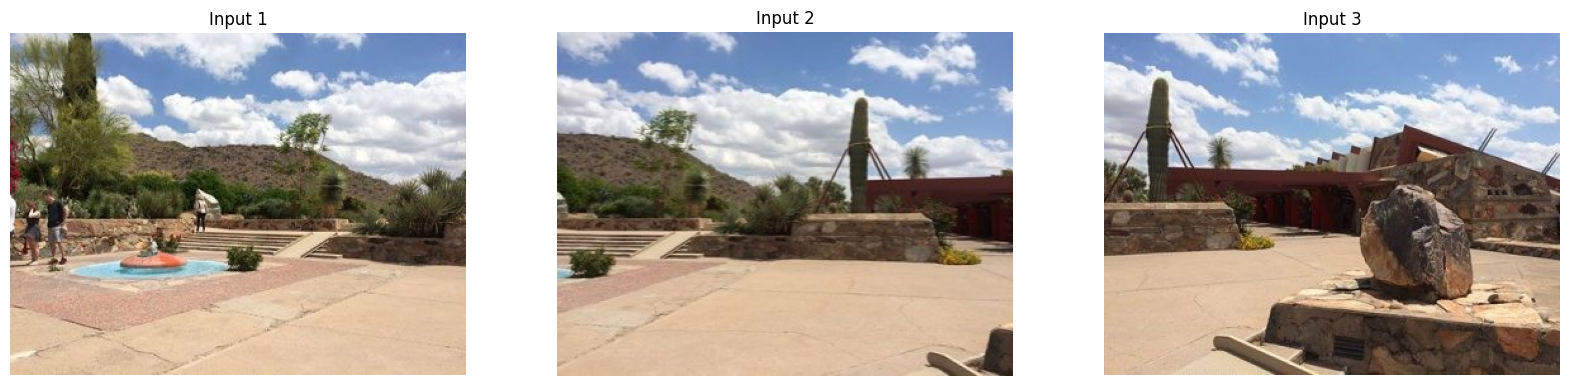

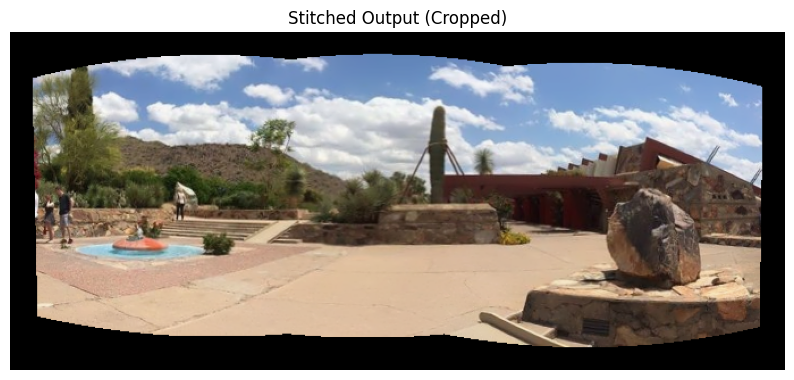

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def main():
    # Define image paths (replace with your actual file paths)
    image_paths = ["monument1.jpg", "monument2.jpg", "monument3.jpg"]

    # Load images
    images = []
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            print(f"Error: Failed to load image {path}")
            return
        images.append(image)

    # Initialize image stitcher
    stitcher = cv2.Stitcher_create()

    # Stitch images
    (status, stitched) = stitcher.stitch(images)

    # Check for successful stitching
    if status != cv2.Stitcher_OK:
        print("[INFO] Image stitching failed ({})".format(status))
        return

    # Convert stitched image to grayscale
    gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)

    # Threshold with adjustable threshold to detect potential black areas
    threshold_value = 5  # Adjust as needed (higher value might leave some dark areas)
    _, mask = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

    # Identify contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Cropping strategy (choose one or combine)
    # 1. Cropping based on largest contour (removes content along black edges)
    if contours:
        areas = [cv2.contourArea(cnt) for cnt in contours]
        max_index = np.argmax(areas)
        x, y, w, h = cv2.boundingRect(contours[max_index])
        stitched_cropped = stitched[y:y+h, x:x+w]

    # 2. Cropping based on non-black pixel coordinates (single black region)
    else:
        non_black_pixels = np.where(mask > 0)
        y_min, y_max, x_min, x_max = non_black_pixels[0].min(), non_black_pixels[0].max(), non_black_pixels[1].min(), non_black_pixels[1].max()
        stitched_cropped = stitched[y_min:y_max, x_min:x_max]

    # Optional: Add a border to reduce content loss
    border_width = 20  # Adjust as needed
    stitched_bordered = cv2.copyMakeBorder(stitched_cropped, border_width, border_width, border_width, border_width, cv2.BORDER_CONSTANT, value=(0, 0, 0))

    # Write the cropped stitched image to disk
    cv2.imwrite("output.jpg", stitched_bordered)

    # Display input and stitched output images
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 6))
    for i, imagePath in enumerate(image_paths):
        img = cv2.imread(imagePath)
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Input {i+1}")
        axes[i].axis('off')

    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(stitched_bordered, cv2.COLOR_BGR2RGB))
    plt.title("Stitched Output (Cropped)")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Kurang yang gabung image 360 derajat